#### Carga de librerias y configuracion basica de graficos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
%matplotlib inline

## Punto 3
Lectura del dataset y vista rapida para validar la carga.

In [2]:
#Definir la ruta del dataset, en este caso se asume que el archivo "heart_disease_uci.csv" se encuentra en la carpeta "input" dentro del directorio actual.
ruta = r"../input/heart_disease_uci.csv"
# Cargar el dataset
df = pd.read_csv(ruta)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
#Renombrar la columna 'num' a 'target' y convertirla a tipo categórico

df = df.rename(columns={
    "num": "target"
})

df['target'] = df['target'].astype('category')

df = df.drop(columns=['id'])

#tambien se puede usar como binario, donde 0 es ausencia de enfermedad y 1 es presencia de enfermedad

In [4]:
# ============================================
# 2. INSPECCIÓN INICIAL
# ============================================
print("\n=== INFORMACIÓN GENERAL ===")
print(df.info())


=== INFORMACIÓN GENERAL ===
<class 'pandas.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    str     
 2   dataset   920 non-null    str     
 3   cp        920 non-null    str     
 4   trestbps  861 non-null    float64 
 5   chol      890 non-null    float64 
 6   fbs       830 non-null    object  
 7   restecg   918 non-null    str     
 8   thalch    865 non-null    float64 
 9   exang     865 non-null    object  
 10  oldpeak   858 non-null    float64 
 11  slope     611 non-null    str     
 12  ca        309 non-null    float64 
 13  thal      434 non-null    str     
 14  target    920 non-null    category
dtypes: category(1), float64(5), int64(1), object(2), str(6)
memory usage: 101.7+ KB
None


In [5]:
print("\n=== ESTADÍSTICAS BÁSICAS ===")
print(df.describe())


=== ESTADÍSTICAS BÁSICAS ===
              age    trestbps        chol      thalch     oldpeak          ca
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000


In [6]:
print("\n=== VALORES FALTANTES POR COLUMNA ===")
print(df.isnull().sum().sort_values(ascending=False))


=== VALORES FALTANTES POR COLUMNA ===
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
age           0
sex           0
dataset       0
cp            0
target        0
dtype: int64


### La anterior Tabla de valores faltantes
Muestra la cantidad y porcentaje de valores nulos por columna, ordenados de mayor a menor.

### Gráfico de proporción de valores nulos
Visualiza la proporción de valores faltantes vs presentes para cada variable usando barras apiladas.

In [7]:
missing = pd.DataFrame({
    "missing": df.isna().sum(),
    "percent": (df.isna().mean() * 100).round(2)
}).sort_values("missing", ascending=False)

print(missing)

          missing  percent
ca            611    66.41
thal          486    52.83
slope         309    33.59
fbs            90     9.78
oldpeak        62     6.74
trestbps       59     6.41
thalch         55     5.98
exang          55     5.98
chol           30     3.26
restecg         2     0.22
age             0     0.00
sex             0     0.00
dataset         0     0.00
cp              0     0.00
target          0     0.00


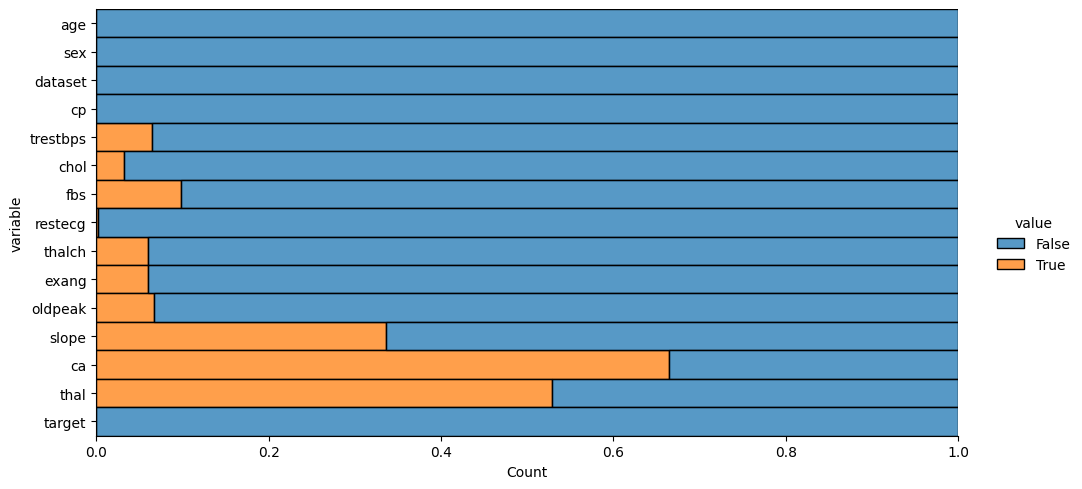

In [8]:
#En cuanto a la proporción de valores nulos por variable, se observa que la mayoría de las columnas no presentan valores faltantes, excepto por "ca" y "thal", que tienen un porcentaje de valores nulos del 0.82% y 0.55% respectivamente. Esto indica que el dataset está bastante completo, aunque se podrían considerar estrategias para manejar los valores faltantes en estas dos columnas si se decide utilizarlas en el análisis o modelado posterior.
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### Heatmap de valores nulos
Mapa de calor que muestra la ubicación de los valores faltantes en el dataset (transpuesto para mejor visualización).

<Axes: >

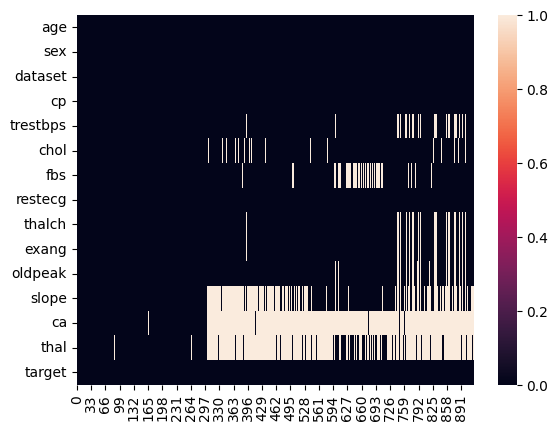

In [9]:
#visualizar los valores nulos con un mapa de calor
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )   
    )
)

In [10]:
# ============================================
# 3. CLASIFICACIÓN DE VARIABLES
# ============================================

target_col = "target"

variables_cualitativas = [
    "sex", "dataset", "cp", "fbs",
    "restecg", "exang", "slope",
    "thal"
]

nominales = ['dataset', 'sex', 'fbs', 'exang', 'restecg']
ordinales = ['cp', 'slope', 'thal']

variables_cuantitativas = [
    "age", "trestbps", "chol",
    "thalch", "oldpeak", "ca"
]

discretas = ['ca']
continuas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

print("Variables cualitativas nominales:", nominales)
print("Variables cualitativas ordinales:", ordinales)
print("Variables cuantitativas discretas:", discretas)
print("Variables cuantitativas continuas:", continuas)

Variables cualitativas nominales: ['dataset', 'sex', 'fbs', 'exang', 'restecg']
Variables cualitativas ordinales: ['cp', 'slope', 'thal']
Variables cuantitativas discretas: ['ca']
Variables cuantitativas continuas: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [11]:
#Imputacion simple por columna (mediana/moda) manteniendo columnas originales
df_imputed = df.copy()

features = df_imputed.drop(columns=[target_col])
num_cols = variables_cuantitativas
cat_cols = variables_cualitativas

# Usar el porcentaje de faltantes ya calculado en `missing`
missing_pct = missing["percent"].to_dict()
num_cols_to_impute = [col for col in num_cols if missing_pct.get(col, 0) < 10]
cat_cols_to_impute = [col for col in cat_cols if missing_pct.get(col, 0) < 10]

# Chol 0 Marcar como NaN UNA PERSONA NO PUEDE TENER COLESTEROL 0, ASI QUE ESTO ES UN ERROR DE REGISTRO
features["chol"] = pd.to_numeric(features["chol"], errors="coerce").replace(0, np.nan)

# Convertir a numerico solo las columnas que se van a imputar
for col in num_cols_to_impute:
    features[col] = pd.to_numeric(features[col], errors="coerce")

num_imputer = sk.impute.SimpleImputer(strategy="median")
cat_imputer = sk.impute.SimpleImputer(strategy="most_frequent")

if num_cols_to_impute:
    features[num_cols_to_impute] = num_imputer.fit_transform(features[num_cols_to_impute])
if cat_cols_to_impute:
    features[cat_cols_to_impute] = cat_imputer.fit_transform(features[cat_cols_to_impute])

df_imputed_simple = features.copy()
df_imputed_simple[target_col] = df[target_col]

# Usar dataset imputado para el resto del analisis
df = df_imputed_simple

In [12]:
#Valores faltantes por columna despues de imputar
print("\n=== VALORES FALTANTES DESPUES DE IMPUTAR ===")
print(df.isnull().sum().sort_values(ascending=False))
print("Debido a la cantidad tan alta de faltantes en las columnas 'ca' y 'thal', \nse decidió no imputar estas variables para evitar introducir sesgos significativos en el análisis. \nPor lo tanto, estas columnas se mantuvieron con sus valores faltantes originales.")


=== VALORES FALTANTES DESPUES DE IMPUTAR ===
ca          611
thal        486
slope       309
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
target        0
dtype: int64
Debido a la cantidad tan alta de faltantes en las columnas 'ca' y 'thal', 
se decidió no imputar estas variables para evitar introducir sesgos significativos en el análisis. 
Por lo tanto, estas columnas se mantuvieron con sus valores faltantes originales.


In [13]:
df[["sex", "dataset", "cp", "thal", "ca"]].head()

,sex,dataset,cp,thal,ca
0,Male,Cleveland,typical angina,fixed defect,0.0
1,Male,Cleveland,asymptomatic,normal,3.0
2,Male,Cleveland,asymptomatic,reversable defect,2.0
3,Male,Cleveland,non-anginal,normal,0.0
4,Female,Cleveland,atypical angina,normal,0.0


### Medidas de resumen
Tabla con media, mediana, desviación estándar, IQR y coeficiente de variación para las variables numéricas.

In [14]:

summary = {}

for col in ["age", "trestbps", "chol", "thalch","ca","oldpeak"]:

    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()

    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    cv = std / mean

    summary[col] = {
        "Media": mean,
        "Mediana": median,
        "DesvStd": std,
        "IQR": iqr,
        "CV": cv
    }

summary_df = pd.DataFrame(summary).T

print("\n=== MEDIDAS DE RESUMEN ===")
print(summary_df)


=== MEDIDAS DE RESUMEN ===
               Media  Mediana    DesvStd    IQR        CV
age        53.510870     54.0   9.424685  13.00  0.176127
trestbps  131.995652    130.0  18.451300  20.00  0.139787
chol      245.222826    239.5  51.785328  49.25  0.211177
thalch    137.692391    140.0  25.145235  36.00  0.182619
ca          0.676375      0.0   0.935653   1.00  1.383334
oldpeak     0.853261      0.5   1.058049   1.50  1.240006


In [15]:
interpretacion = """
    la edad promedio es de 53 años y es cercana a la mediana 54 lo que nos da a entender que los datos son simétricos\n
    hay una desviación estandar muy alta en colesterol\n
    en presión arterial hay poca variación\n
    datos homogéneos en trestbps y heterogéneos en ca y en oldpeak
"""
print("\n=== INTERPRETACIÓN DE LAS MEDIDAS DE RESUMEN ===")
print(interpretacion)


=== INTERPRETACIÓN DE LAS MEDIDAS DE RESUMEN ===

    la edad promedio es de 53 años y es cercana a la mediana 54 lo que nos da a entender que los datos son simétricos

    hay una desviación estandar muy alta en colesterol

    en presión arterial hay poca variación

    datos homogéneos en trestbps y heterogéneos en ca y en oldpeak



### Estadísticas por grupo (target)
Las siguientes tablas muestran media, desviación estándar, cuartiles, IQR y CV para cada variable numérica, agrupadas por presencia/ausencia de enfermedad cardíaca.

In [16]:
df["target"] = df["target"].astype("int64")

df["target_bin"] = (df["target"] > 0).astype(int)
df_age_tag = df.groupby("target_bin")["age"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_age_tag["IQR"] = df_age_tag["Q3"] - df_age_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_age_tag["CV"] = (df_age_tag["std"] / df_age_tag["media"]) * 100

df_age_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,50.547445,9.433700,43.0,51.0,57.0,14.0,18.66306
1,55.903733,8.718959,51.0,57.0,62.0,11.0,15.59638


In [17]:
df_trestbps_tag = df.groupby("target_bin")["trestbps"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_trestbps_tag["IQR"] = df_trestbps_tag["Q3"] - df_trestbps_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_trestbps_tag["CV"] = (df_trestbps_tag["std"] / df_trestbps_tag["media"]) * 100

df_trestbps_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,129.917275,16.453274,120.0,130.0,140.0,20.0,12.664423
1,133.673870,19.776003,120.0,130.0,145.0,25.0,14.794217


In [18]:
df_chol_tag = df.groupby("target_bin")["chol"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_chol_tag["IQR"] = df_chol_tag["Q3"] - df_chol_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_chol_tag["CV"] = (df_chol_tag["std"] / df_chol_tag["media"]) * 100

df_chol_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,240.096107,53.049286,208.5,239.5,266.0,57.5,22.095021
1,249.362475,50.414480,229.0,239.5,267.0,38.0,20.217348


In [19]:
df_thalch_tag = df.groupby("target_bin")["thalch"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_thalch_tag["IQR"] = df_thalch_tag["Q3"] - df_thalch_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_thalch_tag["CV"] = (df_thalch_tag["std"] / df_thalch_tag["media"]) * 100

df_thalch_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,148.372263,23.103587,135.5,150.0,165.0,29.5,15.571365
1,129.068762,23.371722,113.0,130.0,144.0,31.0,18.107962


In [20]:
df_ca_tag = df.groupby("target_bin")["ca"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_ca_tag["IQR"] = df_ca_tag["Q3"] - df_ca_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_ca_tag["CV"] = (df_ca_tag["std"] / df_ca_tag["media"]) * 100

df_ca_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,0.278788,0.640006,0.0,0.0,0.0,0.0,229.567537
1,1.131944,1.012140,0.0,1.0,2.0,2.0,89.416031


In [21]:
df_oldpeak_tag = df.groupby("target_bin")["oldpeak"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_oldpeak_tag["IQR"] = df_oldpeak_tag["Q3"] - df_oldpeak_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_oldpeak_tag["CV"] = (df_oldpeak_tag["std"] / df_oldpeak_tag["media"]) * 100

df_oldpeak_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,0.422384,0.697302,0.0,0.0,0.6,0.6,165.08694
1,1.201179,1.166730,0.0,1.0,2.0,2.0,97.13207


### Tablas cruzadas (variables categóricas)
Proporciones de enfermedad cardíaca para cada categoría de las variables cualitativas.

In [22]:
cat_vars = ['sex','dataset','cp','fbs','restecg','exang','slope','thal']

for col in cat_vars:
    print(f"\n=== {col.upper()} ===")
    print(pd.crosstab(df[col], df["target_bin"], normalize="index"))


=== SEX ===
target_bin         0         1
sex                           
Female      0.742268  0.257732
Male        0.367769  0.632231

=== DATASET ===
target_bin            0         1
dataset                          
Cleveland      0.542763  0.457237
Hungary        0.638225  0.361775
Switzerland    0.065041  0.934959
VA Long Beach  0.255000  0.745000

=== CP ===
target_bin              0         1
cp                                 
asymptomatic     0.209677  0.790323
atypical angina  0.862069  0.137931
non-anginal      0.642157  0.357843
typical angina   0.565217  0.434783

=== FBS ===
target_bin         0         1
fbs                           
False       0.469309  0.530691
True        0.318841  0.681159

=== RESTECG ===
target_bin               0         1
restecg                             
lv hypertrophy    0.436170  0.563830
normal            0.484629  0.515371
st-t abnormality  0.340782  0.659218

=== EXANG ===
target_bin         0         1
exang                        

## Punto 4

### Matriz de correlación y heatmap
Muestra las correlaciones de Pearson entre variables numéricas y la variable objetivo. El heatmap permite identificar visualmente relaciones fuertes.

### Probabilidades condicionales
Cálculo de P(enfermedad | condición) para diferentes factores de riesgo: sexo masculino, dolor sintómatico y pacientes asintomáticos.


=== MATRIZ DE CORRELACIÓN ===
                 age  trestbps      chol    thalch   oldpeak        ca  \
age         1.000000  0.230784  0.067105 -0.349715  0.233550  0.370416   
trestbps    0.230784  1.000000  0.074694 -0.104747  0.161217  0.093705   
chol        0.067105  0.074694  1.000000 -0.023477  0.045755  0.124765   
thalch     -0.349715 -0.104747 -0.023477  1.000000 -0.149401 -0.264094   
oldpeak     0.233550  0.161217  0.045755 -0.149401  1.000000  0.281817   
ca          0.370416  0.093705  0.124765 -0.264094  0.281817  1.000000   
target_bin  0.282700  0.101273  0.089008 -0.381864  0.366138  0.455599   

            target_bin  
age           0.282700  
trestbps      0.101273  
chol          0.089008  
thalch       -0.381864  
oldpeak       0.366138  
ca            0.455599  
target_bin    1.000000  


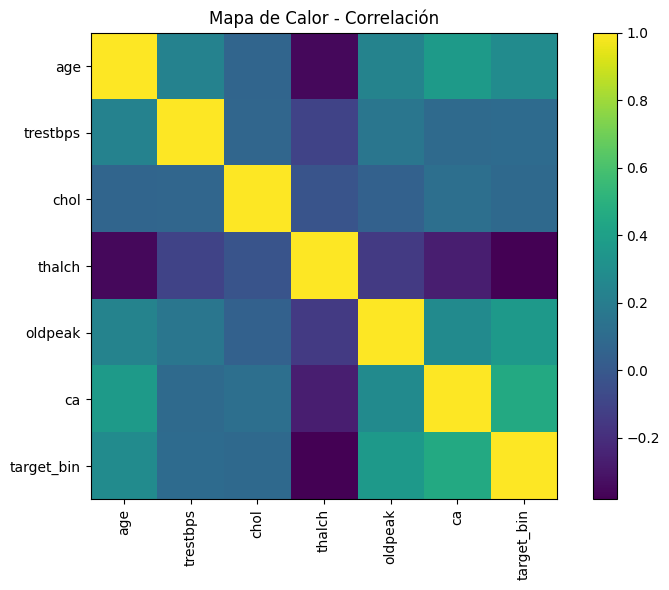

In [23]:
# ============================================
# 6. MATRIZ DE CORRELACIÓN (PUNTO 4)
# ============================================

corr = df[variables_cuantitativas + ["target_bin"]].corr()

print("\n=== MATRIZ DE CORRELACIÓN ===")
print(corr)


# ============================================
# 7. HEATMAP DE CORRELACIÓN
# ============================================

plt.figure(figsize=(8,6))

plt.imshow(corr)

plt.colorbar()

plt.xticks(
    range(len(corr.columns)),
    corr.columns,
    rotation=90
)

plt.yticks(
    range(len(corr.columns)),
    corr.columns
)

plt.title("Mapa de Calor - Correlación")

plt.tight_layout()

plt.show()

In [24]:
# ==========================================================
# 8. CALCULO DE PROBABILIDADES CONDICIONALES
# Estudio de enfermedad cardíaca
# ==========================================================

# Recordatorio teórico
# P(A | B) = casos donde ocurre A y B / casos donde ocurre B
#
# En este análisis:
# A = target_bin == 1  -> paciente con enfermedad
# B = condición que queremos analizar


# ==========================================================
# 1. PROBABILIDAD DE ENFERMEDAD DADO QUE ES HOMBRE
# P(target = 1 | sex = Male)
# ==========================================================

# Pacientes que:
# - Son hombres
# - Tienen enfermedad
male_with_disease = df[
    (df["sex"] == "Male") &
    (df["target_bin"] == 1)
]

# Total de hombres en el dataset
total_males = df[
    df["sex"] == "Male"
]

# Probabilidad condicional
p_male = len(male_with_disease) / len(total_males)


# ==========================================================
# 2. PROBABILIDAD DE ENFERMEDAD CUANDO EL DOLOR NO ES ASINTOMÁTICO
# P(target = 1 | cp != asymptomatic)
# ==========================================================

# Pacientes con síntomas y con enfermedad
symptomatic_with_disease = df[
    (df["cp"] != "asymptomatic") &
    (df["target_bin"] == 1)
]

# Total de pacientes con síntomas
total_symptomatic = df[
    df["cp"] != "asymptomatic"
]

# Probabilidad condicional
p_cp = len(symptomatic_with_disease) / len(total_symptomatic)


# ==========================================================
# 3. PROBABILIDAD DE ENFERMEDAD SI EL PACIENTE ES ASINTOMÁTICO
# P(target = 1 | cp = asymptomatic)
# ==========================================================

# Pacientes asintomáticos con enfermedad
asymptomatic_with_disease = df[
    (df["cp"] == "asymptomatic") &
    (df["target_bin"] == 1)
]

# Total de pacientes asintomáticos
total_asymptomatic = df[
    df["cp"] == "asymptomatic"
]

# Probabilidad condicional
p_asym = len(asymptomatic_with_disease) / len(total_asymptomatic)


# ==========================================================
# 4. RESULTADOS
# ==========================================================

print("\n=========== RESULTADOS ===========")

print(
    "Probabilidad de enfermedad en hombres:",
    round(p_male, 3)
)

print(
    "Probabilidad de enfermedad con dolor sintomático:",
    round(p_cp, 3)
)

print(
    "Probabilidad de enfermedad en pacientes asintomáticos:",
    round(p_asym, 3)
)


=========== RESULTADOS ===========
Probabilidad de enfermedad en hombres: 0.632
Probabilidad de enfermedad con dolor sintomático: 0.276
Probabilidad de enfermedad en pacientes asintomáticos: 0.79


In [25]:
interpretacion2 = """"
    INTERPRETACIÓN\n
    Hay un factor de riesgo alto en hombres, 6 de cada 10 hombres presentan la enfermedad.\n
    Es algo extraño que los pacientes asintomáticos sean tan altos, puede que esten mal diagnosticados.\n
    Lo anterior no significa que no tengan nada si no que puede que los sintomas no sean tan claros.
"""

print(interpretacion2)

"
    INTERPRETACIÓN

    Hay un factor de riesgo alto en hombres, 6 de cada 10 hombres presentan la enfermedad.

    Es algo extraño que los pacientes asintomáticos sean tan altos, puede que esten mal diagnosticados.

    Lo anterior no significa que no tengan nada si no que puede que los sintomas no sean tan claros.



## Punto 5

### Histogramas
Distribución de frecuencias para edad y colesterol. Permiten observar la forma de la distribución y detectar posibles asimetrías.

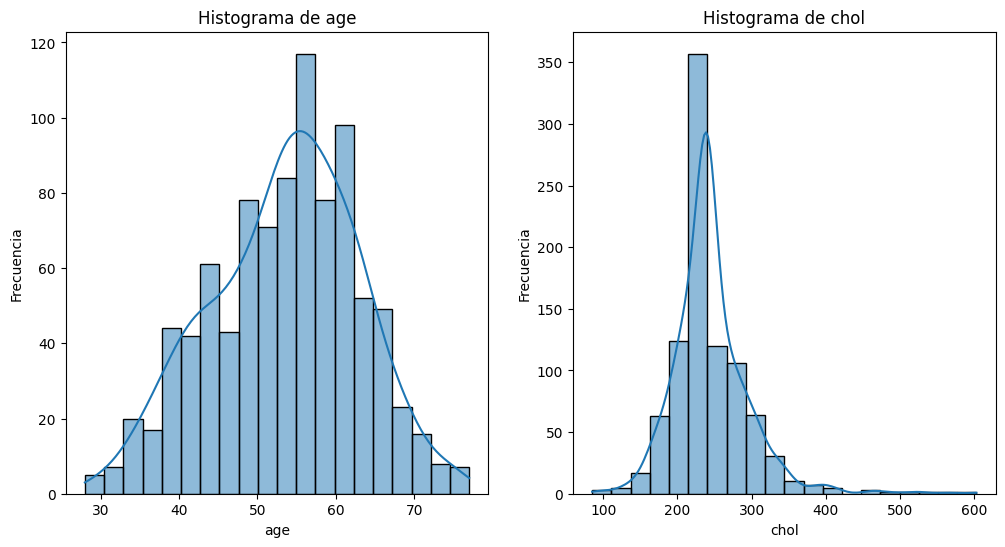

In [38]:
# ============================================
# 9. HISTOGRAMAS (PUNTO 5)
# ============================================
variables = ["age", "chol"]

fig, ax = plt.subplots(1, len(variables), figsize=(12,6))
ax.flatten()
for i, col in enumerate(variables):

    sns.histplot(
        df[col].dropna(),
        bins=20,
        ax=ax[i],
        kde=True
    )

    ax[i].set_title(f"Histograma de {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frecuencia")

plt.show()

### Conclusion (Histogramas)
La edad muestra una distribucion mas concentrada, mientras que el colesterol presenta mayor dispersion y colas mas largas. No se observan multiples picos claros, por lo que una sola poblacion parece dominar la muestra.

### Gráficos de barras
Muestran la frecuencia de cada categoría en sexo, tipo de dolor torácico y variable objetivo.

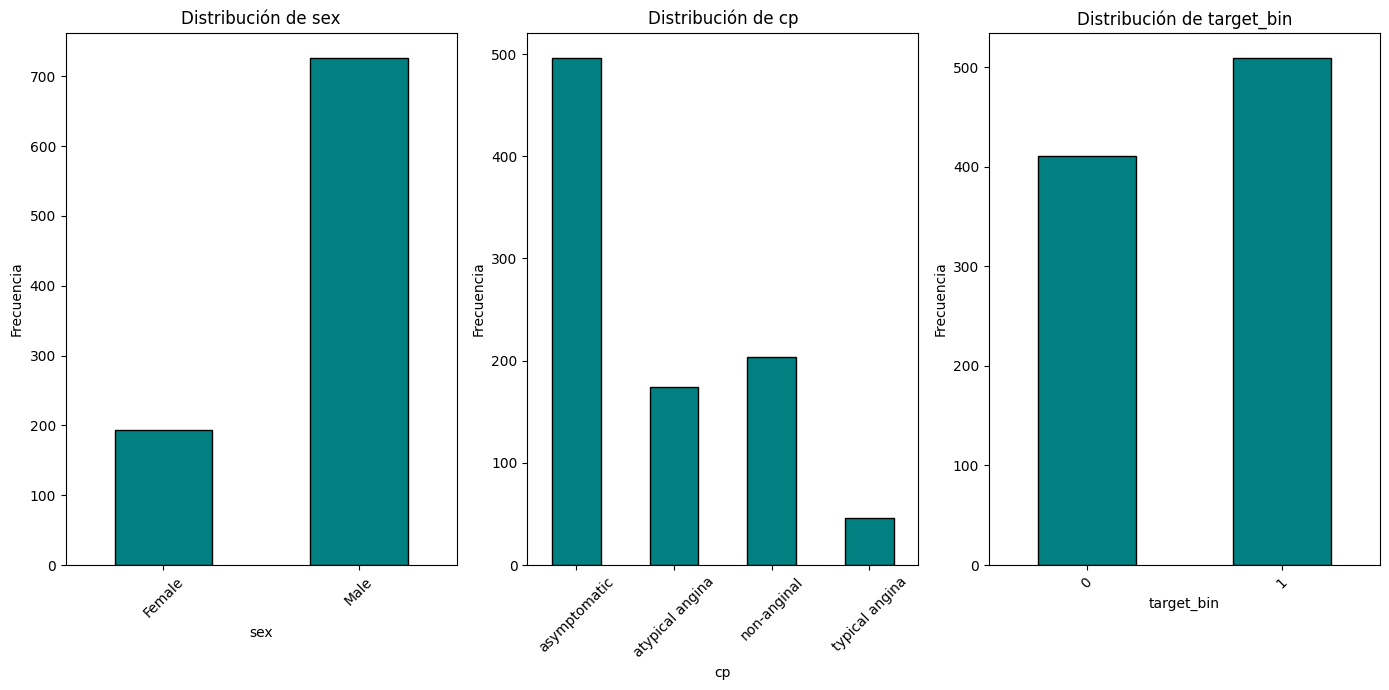

In [40]:
# ============================================
# 10. GRÁFICOS DE BARRAS (PUNTO 5)
# ============================================
variables2 = ["sex", "cp", "target_bin"]

# Creamos la fila de subplots
fig, ax = plt.subplots(1, len(variables2), figsize=(14, 7))

for i, col in enumerate(variables2):
    counts = df[col].value_counts().sort_index()
    
    counts.plot(kind="bar", ax=ax[i], color="teal", edgecolor="black")
    
    ax[i].set_title(f"Distribución de {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frecuencia")
    ax[i].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

### Conclusion (Graficos de barras)
Se observan categorias con mayor frecuencia, lo que indica distribuciones desbalanceadas. Esto puede influir en comparaciones y conviene considerarlo al interpretar proporciones por grupo.

### Boxplots
Comparan la distribución de variables numéricas entre pacientes con y sin enfermedad. Permiten identificar diferencias en medianas y presencia de outliers.

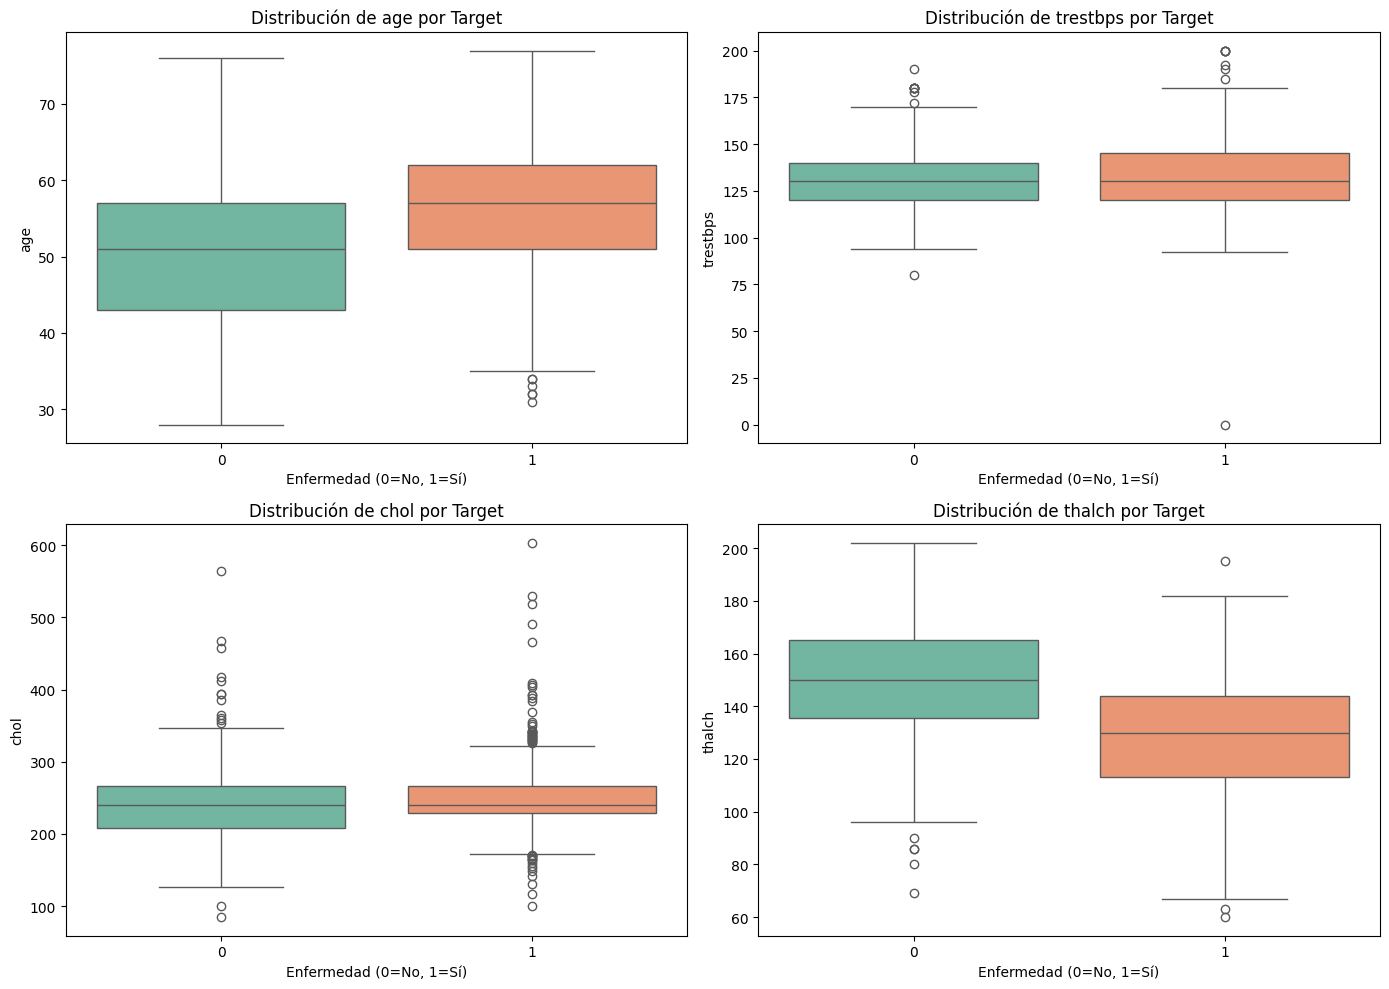

In [36]:
# ============================================
# 11. BOXPLOT (PUNTO 5)
# ============================================
cols_num = ["age", "trestbps", "chol", "thalch"]

# Creamos una cuadrícula de 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() 

for i, col in enumerate(cols_num):
    sns.boxplot(
        x="target_bin", 
        y=col, 
        data=df, 
        ax=axes[i], 
        palette="Set2",
        hue="target_bin", 
        legend=False
    )
    axes[i].set_title(f"Distribución de {col} por Target")
    axes[i].set_xlabel("Enfermedad (0=No, 1=Sí)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Conclusion (Boxplots)
Las medianas y la dispersion difieren entre pacientes con y sin enfermedad, lo que sugiere asociacion entre las variables numericas y el target. Tambien se aprecian posibles outliers que pueden afectar el analisis.

### Scatter plot (Edad vs Colesterol)
Gráfico de dispersión para explorar la relación entre edad y colesterol. Ayuda a identificar patrones o agrupaciones.

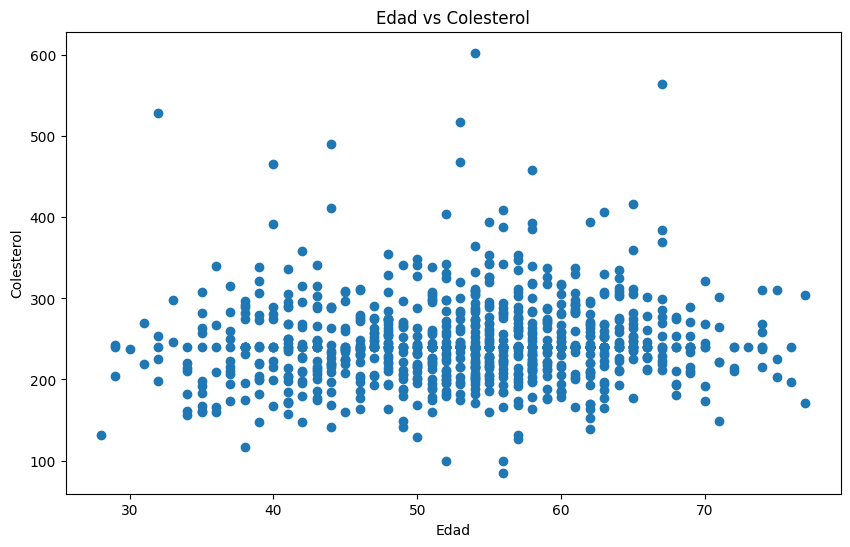


=== EDA FINALIZADO ===


In [41]:
# ============================================
# 12. SCATTER PLOT (PUNTO 5)
# ============================================

plt.figure(figsize=(10,6))

plt.scatter(
    df["age"],
    df["chol"]
)

plt.title("Edad vs Colesterol")
plt.xlabel("Edad")
plt.ylabel("Colesterol")

plt.show()

print("\n=== EDA FINALIZADO ===")

### Conclusion (Scatter plot)
La nube de puntos es dispersa y no evidencia una relacion lineal fuerte entre edad y colesterol. Esto sugiere que, si existe relacion, podria ser debil o no lineal.

### Integrantes

## Hildebrando Galvis Sepúlveda
## Juan Pablo Velez Hurtado